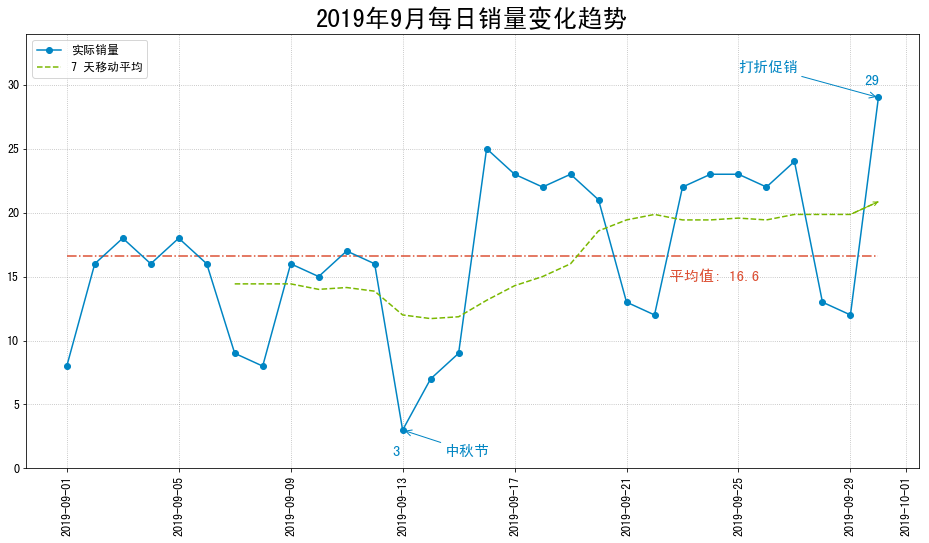

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# 正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']  

# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False  

# 读取每日销售数据
df = pd.read_excel('../data/2019年9月每日销售.xlsx')

# 定义画图的数据
x = df.日期
y = df.实际销量

# 定义颜色
color1 = '#0085c3'
color2 = '#7ab800'
color3 = '#dc5034'

# 设置图像大小
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)

# 绘制折线图
ax.plot(x, y, marker='o', color=color1)

# 标注最大值
ax.text(x[y.idxmax()]+timedelta(hours=-12), 
        y.max()+1, y.max(), 
        color=color1, fontsize=15)

# 标注最小值
ax.text(x[y.idxmin()]+timedelta(hours=-9), 
        y.min()-2, y.min(), 
        color=color1, fontsize=15)

# 计算 7 天移动平均
y2 = y.rolling(7).mean()

# 绘制趋势线
ax.plot(x, y2, ls='--', color=color2, label='7 天移动平均')

# 绘制箭头
plt.annotate('', xy=(x[-1:], y2[-1:]), 
             xytext=(x[-2:-1], y2[-2:-1]), 
             arrowprops=dict(arrowstyle='->', 
                             color=color2, 
                             shrinkB=0))

# 绘制平均值线
ax.hlines(y.mean(), x[0], x[-1:], 
          linestyles='-.', colors=color3)

# 标注平均值
ax.text(x[-1:]+timedelta(days=-7.5), y.mean()-2, 
        '平均值: ' + str(round(y.mean(),1)), 
        color=color3, fontsize=15)

# 标注特殊事件
ax.annotate('中秋节', xy=(x[y.idxmin()], y.min()), color=color1,
             xytext=(x[y.idxmin()]+timedelta(days=1.5), y.min()-2), 
             arrowprops=dict(arrowstyle='->', color=color1), fontsize=15)


ax.annotate('打折促销', xy=(x[y.idxmax()], y.max()), color=color1,
             xytext=(x[y.idxmax()]+timedelta(days=-5), y.max()+2), 
             arrowprops=dict(arrowstyle='->', color=color1), fontsize=15)

# 设置网格线
ax.grid(ls=':', color='gray', alpha=0.6)

# 设置图例的位置和大小
ax.legend(loc='upper left', fontsize=12)

# 设置坐标轴标签的角度和大小
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# 设置 y 轴的刻度范围
ax.set_ylim(0, y.max()+5)

# 设置图表标题
_ = ax.set_title('2019年9月每日销量变化趋势', fontsize=25)